<a href="https://colab.research.google.com/github/krithika-velumani/Attendance-Tracking-System/blob/main/scaffolded%20project(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
print(os.path.exists("/content/drive/MyDrive/archive (10).zip"))


True


In [3]:
!unzip "/content/drive/MyDrive/archive (10).zip" -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/sad/Training_65242339.jpg  
  inflating: /content/dataset/train/sad/Training_65267116.jpg  
  inflating: /content/dataset/train/sad/Training_65275626.jpg  
  inflating: /content/dataset/train/sad/Training_6529266.jpg  
  inflating: /content/dataset/train/sad/Training_65329617.jpg  
  inflating: /content/dataset/train/sad/Training_65338712.jpg  
  inflating: /content/dataset/train/sad/Training_65338797.jpg  
  inflating: /content/dataset/train/sad/Training_65387162.jpg  
  inflating: /content/dataset/train/sad/Training_65404494.jpg  
  inflating: /content/dataset/train/sad/Training_65426218.jpg  
  inflating: /content/dataset/train/sad/Training_65430136.jpg  
  inflating: /content/dataset/train/sad/Training_65437377.jpg  
  inflating: /content/dataset/train/sad/Training_6545735.jpg  
  inflating: /content/dataset/train/sad/Training_65463385.jpg  
  inflating: /content/dataset/train/sad/Training_654739

In [4]:
print(os.listdir("/content/dataset"))


['train', 'test']


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/dataset/train"
test_path = "/content/dataset/test"

# ✅ Data Augmentation for TRAIN
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# ✅ Only normalization for TEST
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7177 images belonging to 7 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

cnn_model = Sequential([
    Input(shape=(48,48,1)),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')
])


In [17]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "/content/drive/MyDrive/cnn_best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)


In [19]:
history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1691 - loss: 2.8899
Epoch 1: val_accuracy improved from -inf to 0.21512, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.1691 - loss: 2.8896 - val_accuracy: 0.2151 - val_loss: 4.1247
Epoch 2/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2256 - loss: 2.2877
Epoch 2: val_accuracy did not improve from 0.21512
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2256 - loss: 2.2875 - val_accuracy: 0.1895 - val_loss: 5.6012
Epoch 3/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2435 - loss: 2.1106
Epoch 3: val_accuracy improved from 0.21512 to 0.22365, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.2435 - loss: 2.1106 - val_accuracy: 0.2237 - val_loss: 5.5092
Epoch 4/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2640 - loss: 2.0046
Epoch 4: val_accuracy improved from 0.22365 to 0.23515, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2640 - loss: 2.0046 - val_accuracy: 0.2352 - val_loss: 4.0466
Epoch 5/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2835 - loss: 1.9208
Epoch 5: val_accuracy improved from 0.23515 to 0.27852, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.2835 - loss: 1.9208 - val_accuracy: 0.2785 - val_loss: 2.6974
Epoch 6/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3060 - loss: 1.8317
Epoch 6: val_accuracy improved from 0.27852 to 0.32033, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3060 - loss: 1.8316 - val_accuracy: 0.3203 - val_loss: 2.2208
Epoch 7/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3354 - loss: 1.7577
Epoch 7: val_accuracy improved from 0.32033 to 0.37746, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3354 - loss: 1.7576 - val_accuracy: 0.3775 - val_loss: 1.7543
Epoch 8/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3586 - loss: 1.6908
Epoch 8: val_accuracy improved from 0.37746 to 0.39854, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3586 - loss: 1.6908 - val_accuracy: 0.3985 - val_loss: 1.6385
Epoch 9/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3851 - loss: 1.6202
Epoch 9: val_accuracy improved from 0.39854 to 0.42240, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3851 - loss: 1.6202 - val_accuracy: 0.4224 - val_loss: 1.5579
Epoch 10/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4045 - loss: 1.5638
Epoch 10: val_accuracy improved from 0.42240 to 0.42710, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.4046 - loss: 1.5638 - val_accuracy: 0.4271 - val_loss: 1.5451
Epoch 11/30
716/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4206 - loss: 1.5025
Epoch 11: val_accuracy improved from 0.42710 to 0.44592, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.4206 - loss: 1.5025 - val_accuracy: 0.4459 - val_loss: 1.5423
Epoch 12/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4278 - loss: 1.4879
Epoch 12: val_accuracy improved from 0.44592 to 0.45968, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4278 - loss: 1.4878 - val_accuracy: 0.4597 - val_loss: 1.4808
Epoch 13/30
716/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4401 - loss: 1.4586
Epoch 13: val_accuracy improved from 0.45968 to 0.48267, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.4402 - loss: 1.4585 - val_accuracy: 0.4827 - val_loss: 1.3812
Epoch 14/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4688 - loss: 1.4059
Epoch 14: val_accuracy improved from 0.48267 to 0.49312, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4688 - loss: 1.4059 - val_accuracy: 0.4931 - val_loss: 1.3586
Epoch 15/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4743 - loss: 1.3870
Epoch 15: val_accuracy improved from 0.49312 to 0.49800, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4743 - loss: 1.3870 - val_accuracy: 0.4980 - val_loss: 1.3333
Epoch 16/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4807 - loss: 1.3680
Epoch 16: val_accuracy did not improve from 0.49800
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.4807 - loss: 1.3680 - val_accuracy: 0.4881 - val_loss: 1.4131
Epoch 17/30
716/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4768 - loss: 1.3642
Epoch 17: val_accuracy improved from 0.49800 to 0.50618, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.4769 - loss: 1.3642 - val_accuracy: 0.5062 - val_loss: 1.3478
Epoch 18/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4998 - loss: 1.3298
Epoch 18: val_accuracy did not improve from 0.50618
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.4998 - loss: 1.3298 - val_accuracy: 0.4564 - val_loss: 1.8895
Epoch 19/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5004 - loss: 1.3097
Epoch 19: val_accuracy improved from 0.50618 to 0.51594, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5004 - loss: 1.3097 - val_accuracy: 0.5159 - val_loss: 1.2710
Epoch 20/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 1.3119
Epoch 20: val_accuracy improved from 0.51594 to 0.52308, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5000 - loss: 1.3119 - val_accuracy: 0.5231 - val_loss: 1.2629
Epoch 21/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5054 - loss: 1.2874
Epoch 21: val_accuracy improved from 0.52308 to 0.53910, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.5054 - loss: 1.2874 - val_accuracy: 0.5391 - val_loss: 1.2349
Epoch 22/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5168 - loss: 1.2724
Epoch 22: val_accuracy did not improve from 0.53910
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.5168 - loss: 1.2724 - val_accuracy: 0.5163 - val_loss: 1.2922
Epoch 23/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5198 - loss: 1.2764
Epoch 23: val_accuracy did not improve from 0.53910
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.5198 - loss: 1.2764 - val_accuracy: 0.5116 - val_loss: 1.3250
Epoch 24/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5277 - loss: 1.2559
Epoch 24: val_accuracy did not improve from 0.53910
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.5277 - loss: 1.2559 - val_accuracy: 0.5327 - val_loss: 1.2231
Epoch 25/30
716/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5217 - loss: 1.2566
Epoch 25: val_ac

718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.5217 - loss: 1.2565 - val_accuracy: 0.5476 - val_loss: 1.2087
Epoch 26/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5261 - loss: 1.2440
Epoch 26: val_accuracy did not improve from 0.54764
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.5260 - loss: 1.2441 - val_accuracy: 0.5379 - val_loss: 1.2158
Epoch 27/30
716/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5313 - loss: 1.2346
Epoch 27: val_accuracy improved from 0.54764 to 0.54816, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5313 - loss: 1.2346 - val_accuracy: 0.5482 - val_loss: 1.2161
Epoch 28/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5356 - loss: 1.2276
Epoch 28: val_accuracy did not improve from 0.54816
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.5356 - loss: 1.2276 - val_accuracy: 0.5365 - val_loss: 1.2505
Epoch 29/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5420 - loss: 1.2100
Epoch 29: val_accuracy did not improve from 0.54816
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.5420 - loss: 1.2100 - val_accuracy: 0.5457 - val_loss: 1.2041
Epoch 30/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5418 - loss: 1.2062
Epoch 30: val_accuracy improved from 0.54816 to 0.55060, saving model to /content/drive/MyDrive/cnn_best_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.5418 - loss: 1.2063 - val_accuracy: 0.5506 - val_loss: 1.1786


In [20]:
cnn_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965,495 (15.13 MB)

 Trainable params: 1,321,511 (5.04 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2,643,024 (10.08 MB)

In [21]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5292 - loss: 1.2222
Test Loss: 1.127023696899414
Test Accuracy: 0.5687613487243652


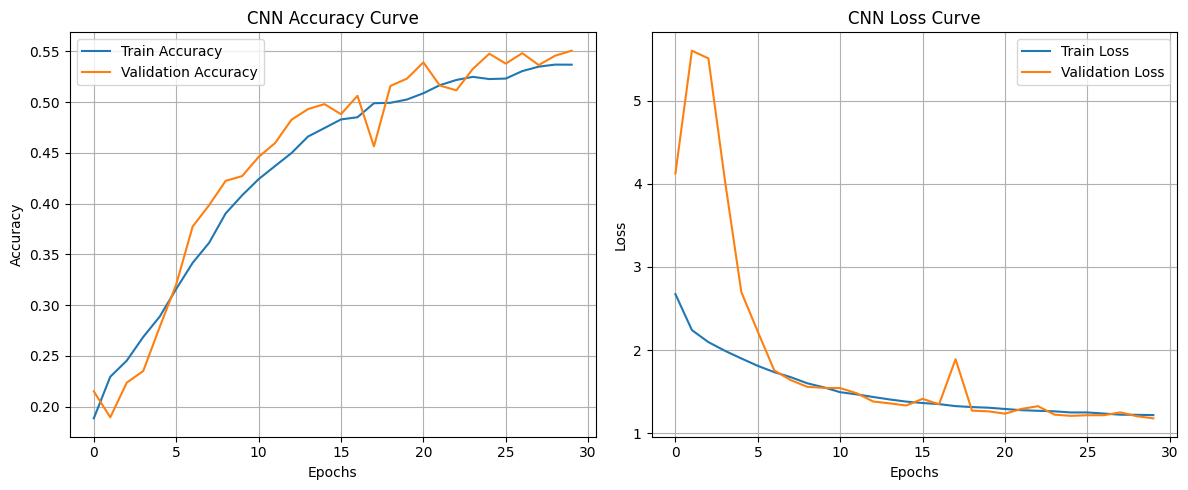

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# -------- Accuracy Plot --------
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy Curve')
plt.legend()
plt.grid(True)

# -------- Loss Plot --------
plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step


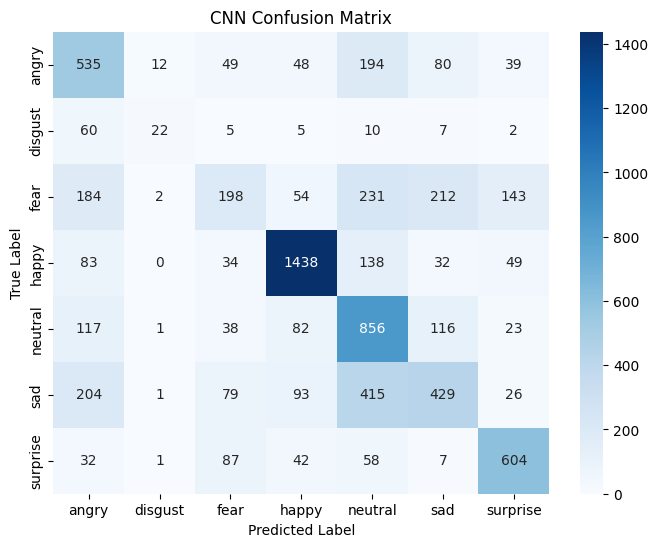


Classification Report:

              precision    recall  f1-score   support

       angry       0.44      0.56      0.49       957
     disgust       0.56      0.20      0.29       111
        fear       0.40      0.19      0.26      1024
       happy       0.82      0.81      0.81      1774
     neutral       0.45      0.69      0.55      1233
         sad       0.49      0.34      0.40      1247
    surprise       0.68      0.73      0.70       831

    accuracy                           0.57      7177
   macro avg       0.55      0.50      0.50      7177
weighted avg       0.57      0.57      0.55      7177



In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels
y_true = test_generator.classes

# Predict probabilities
y_pred_probs = cnn_model.predict(test_generator)

# Convert probabilities to class index
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

mlp_model = Sequential([
    Input(shape=(48,48,1)),
    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(7, activation='softmax')
])


In [23]:
mlp_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
mlp_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,879 (2.38 MB)

 Trainable params: 623,879 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history_mlp = mlp_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.2189 - loss: 1.8816 - val_accuracy: 0.2576 - val_loss: 1.8041
Epoch 2/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.2416 - loss: 1.8248 - val_accuracy: 0.2554 - val_loss: 1.8016
Epoch 3/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.2532 - loss: 1.8091 - val_accuracy: 0.2749 - val_loss: 1.7915
Epoch 4/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.2613 - loss: 1.8002 - val_accuracy: 0.2691 - val_loss: 1.7875
Epoch 5/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.2720 - loss: 1.7886 - val_accuracy: 0.2726 - val_loss: 1.7778
Epoch 6/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.2658 - loss: 1.7901 - val_accuracy: 0.2756 - val_loss: 1.7715
Epoch 7/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.2713 - loss: 1.7875 - val_accuracy: 0.2796 - val_loss: 1.7741
Epoch 8/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.2701 - loss: 1.7875 - 

In [26]:
test_loss_mlp, test_accuracy_mlp = mlp_model.evaluate(test_generator)

print("MLP Test Loss:", test_loss_mlp)
print(f"MLP Test Accuracy: {test_accuracy_mlp * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2182 - loss: 1.8112
MLP Test Loss: 1.6913087368011475
MLP Test Accuracy: 33.77%


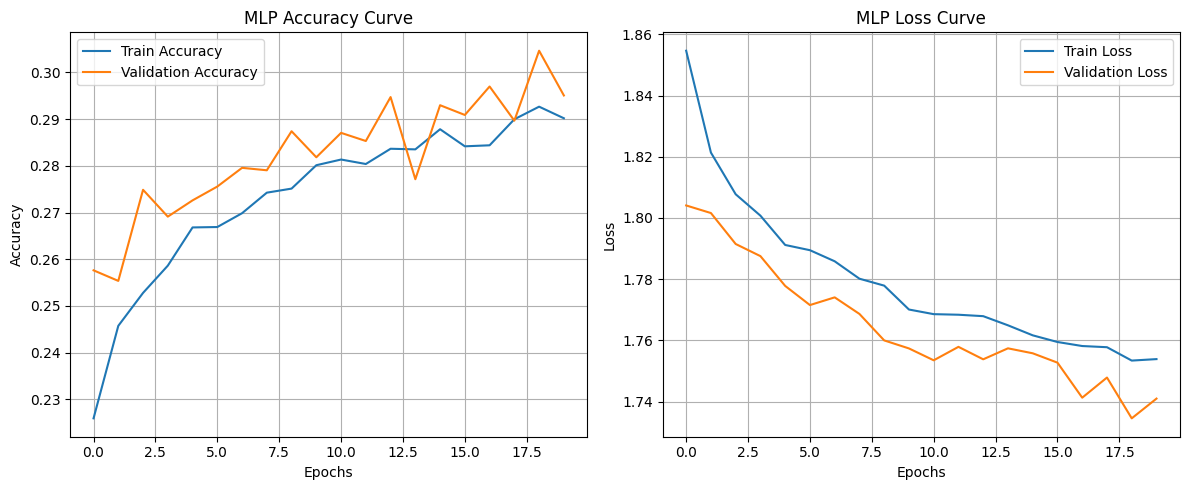

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# -------- Accuracy Plot --------
plt.subplot(1,2,1)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MLP Accuracy Curve')
plt.legend()
plt.grid(True)

# -------- Loss Plot --------
plt.subplot(1,2,2)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Loss Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


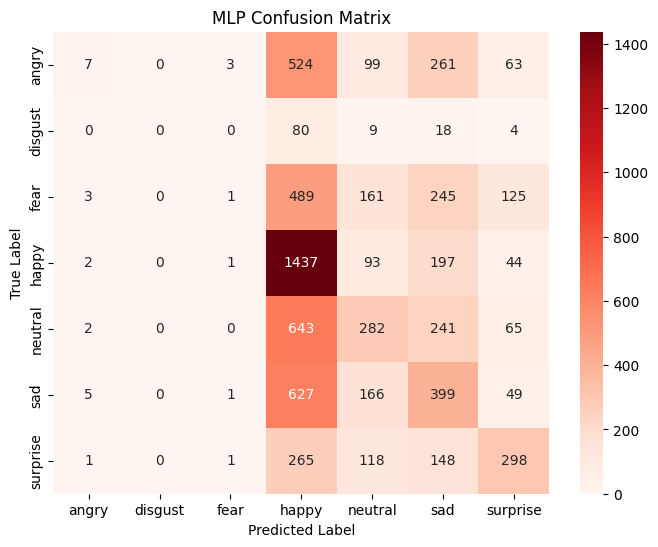


Classification Report:

              precision    recall  f1-score   support

       angry       0.35      0.01      0.01       957
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.00      0.00      1024
       happy       0.35      0.81      0.49      1774
     neutral       0.30      0.23      0.26      1233
         sad       0.26      0.32      0.29      1247
    surprise       0.46      0.36      0.40       831

    accuracy                           0.34      7177
   macro avg       0.27      0.25      0.21      7177
weighted avg       0.31      0.34      0.27      7177



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels
y_true = test_generator.classes

# Predict probabilities using MLP
y_pred_probs = mlp_model.predict(test_generator)

# Convert probabilities to predicted class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [34]:
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(test_generator)

print("CNN Test Accuracy:", test_accuracy_cnn)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5292 - loss: 1.2222
CNN Test Accuracy: 0.5687613487243652


In [35]:
test_loss_mlp, test_accuracy_mlp = mlp_model.evaluate(test_generator)

print("MLP Test Accuracy:", test_accuracy_mlp)


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2182 - loss: 1.8112
MLP Test Accuracy: 0.3377455770969391


In [36]:
import pandas as pd

mlp_train_acc = history_mlp.history['accuracy'][-1]
mlp_val_acc = history_mlp.history['val_accuracy'][-1]

cnn_train_acc = history_cnn.history['accuracy'][-1]
cnn_val_acc = history_cnn.history['val_accuracy'][-1]

comparison_df = pd.DataFrame({
    "Model": ["MLP", "CNN"],
    "Train Accuracy": [mlp_train_acc, cnn_train_acc],
    "Validation Accuracy": [mlp_val_acc, cnn_val_acc],
    "Test Accuracy": [test_accuracy_mlp, test_accuracy_cnn]
})

comparison_df


,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,MLP,0.290186,0.295071,0.337746
1,CNN,0.536834,0.550601,0.568761


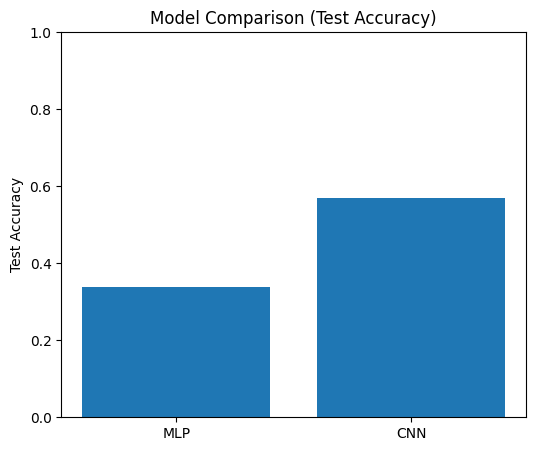

In [37]:
import matplotlib.pyplot as plt

models = ['MLP', 'CNN']
test_accuracies = [test_accuracy_mlp, test_accuracy_cnn]

plt.figure(figsize=(6,5))
plt.bar(models, test_accuracies)

plt.ylabel("Test Accuracy")
plt.title("Model Comparison (Test Accuracy)")
plt.ylim(0,1)   # since accuracy is between 0 and 1
plt.show()


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

def build_cnn(learning_rate=0.0001, dropout_rate=0.5):

    model = Sequential([
        Input(shape=(48,48,1)),

        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(7, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [42]:
learning_rates = [0.001, 0.0001]
lr_results = {}

for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")

    model = build_cnn(learning_rate=lr)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=8,
        verbose=1
    )

    lr_results[lr] = history.history['val_accuracy'][-1]

print("\nLearning Rate Tuning Results:")
print(lr_results)



Training with Learning Rate: 0.001
Epoch 1/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.2169 - loss: 2.2928 - val_accuracy: 0.2512 - val_loss: 2.0495
Epoch 2/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.3257 - loss: 1.6965 - val_accuracy: 0.2611 - val_loss: 1.8623
Epoch 3/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.3976 - loss: 1.5631 - val_accuracy: 0.3872 - val_loss: 1.5835
Epoch 4/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.4138 - loss: 1.5055 - val_accuracy: 0.4482 - val_loss: 1.4562
Epoch 5/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.4345 - loss: 1.4631 - val_accuracy: 0.2472 - val_loss: 1.7804
Epoch 6/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4492 - loss: 1.4378 - val_accuracy: 0.4463 - val_loss: 1.4639
Epoch 7/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.4585 - loss: 1.4024 - val_accuracy: 0.3822 - val_loss: 3.9689
Epoch 8/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accura

In [43]:
dropout_rates = [0.3, 0.5]
dropout_results = {}

for dr in dropout_rates:
    print(f"\nTraining with Dropout Rate: {dr}")

    model = build_cnn(dropout_rate=dr)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=8,
        verbose=1
    )

    dropout_results[dr] = history.history['val_accuracy'][-1]

print("\nDropout Tuning Results:")
print(dropout_results)



Training with Dropout Rate: 0.3
Epoch 1/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.1883 - loss: 2.5150 - val_accuracy: 0.2460 - val_loss: 2.4052
Epoch 2/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.2540 - loss: 2.0343 - val_accuracy: 0.2831 - val_loss: 2.3430
Epoch 3/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.2811 - loss: 1.9167 - val_accuracy: 0.2998 - val_loss: 1.9826
Epoch 4/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.3019 - loss: 1.8390 - val_accuracy: 0.3400 - val_loss: 1.7291
Epoch 5/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.3239 - loss: 1.7775 - val_accuracy: 0.3682 - val_loss: 1.6912
Epoch 6/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.3344 - loss: 1.7395 - val_accuracy: 0.3546 - val_loss: 1.6550
Epoch 7/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.3554 - loss: 1.6827 - val_accuracy: 0.3973 - val_loss: 1.5420
Epoch 8/8
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy:

In [44]:
import pandas as pd

lr_df = pd.DataFrame({
    "Learning Rate": list(lr_results.keys()),
    "Validation Accuracy": list(lr_results.values())
})

dropout_df = pd.DataFrame({
    "Dropout Rate": list(dropout_results.keys()),
    "Validation Accuracy": list(dropout_results.values())
})

print("Learning Rate Tuning:")
display(lr_df)

print("\nDropout Tuning:")
display(dropout_df)


Learning Rate Tuning:


,Learning Rate,Validation Accuracy
0,0.0010,0.413517
1,0.0001,0.379899



Dropout Tuning:


,Dropout Rate,Validation Accuracy
0,0.3,0.400801
1,0.5,0.398537


In [45]:
final_cnn = build_cnn(learning_rate=0.0001, dropout_rate=0.3)

history_final = final_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

test_loss_final, test_accuracy_final = final_cnn.evaluate(test_generator)

print("Final Tuned CNN Test Accuracy:", test_accuracy_final)


Epoch 1/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.1922 - loss: 2.4902 - val_accuracy: 0.2446 - val_loss: 2.4516
Epoch 2/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.2569 - loss: 2.0212 - val_accuracy: 0.2989 - val_loss: 2.0318
Epoch 3/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.2812 - loss: 1.8912 - val_accuracy: 0.3195 - val_loss: 1.8735
Epoch 4/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.3087 - loss: 1.8163 - val_accuracy: 0.3144 - val_loss: 1.8743
Epoch 5/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.3253 - loss: 1.7558 - val_accuracy: 0.3531 - val_loss: 1.8107
Epoch 6/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.3544 - loss: 1.6978 - val_accuracy: 0.3804 - val_loss: 1.5979
Epoch 7/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.3658 - loss: 1.6457 - val_accuracy: 0.4065 - val_loss: 1.5456
Epoch 8/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.3801 - loss: 1.6119 - 

In [46]:
batch_sizes = [32, 64]
batch_results = {}


In [47]:
for bs in batch_sizes:
    print(f"\nTraining with Batch Size = {bs}")

    # Recreate generators with new batch size
    train_gen = train_datagen.flow_from_directory(
        train_path,
        target_size=(48,48),
        color_mode="grayscale",
        batch_size=bs,
        class_mode="categorical"
    )

    val_gen = test_datagen.flow_from_directory(
        test_path,
        target_size=(48,48),
        color_mode="grayscale",
        batch_size=bs,
        class_mode="categorical"
    )

    # Build model using BEST learning rate and BEST dropout
    model = build_cnn(learning_rate=0.0001, dropout_rate=0.3)

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=8,
        verbose=1
    )

    batch_results[bs] = history.history['val_accuracy'][-1]



Training with Batch Size = 32
Found 28709 images belonging to 7 classes.
Found 7177 images belonging to 7 classes.
Epoch 1/8


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.1906 - loss: 2.5332 - val_accuracy: 0.2608 - val_loss: 2.2538
Epoch 2/8
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2455 - loss: 2.0546 - val_accuracy: 0.2837 - val_loss: 2.0163
Epoch 3/8
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2648 - loss: 1.9415 - val_accuracy: 0.3235 - val_loss: 1.7760
Epoch 4/8
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2909 - loss: 1.8601 - val_accuracy: 0.3662 - val_loss: 1.6221
Epoch 5/8
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3113 - loss: 1.7999 - val_accuracy: 0.3917 - val_loss: 1.5922
Epoch 6/8
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3333 - loss: 1.7387 - val_accuracy: 0.4261 - val_loss: 1.5157
Epoch 7/8
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3549 - loss: 1.6750 - val_accuracy: 0.4422 - val_loss: 1.4784
Epoch 8/8
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3662 - loss: 1.6435 - val_accuracy: 0.42

In [48]:
import pandas as pd

batch_df = pd.DataFrame({
    "Batch Size": list(batch_results.keys()),
    "Validation Accuracy": list(batch_results.values())
})

batch_df


,Batch Size,Validation Accuracy
0,32,0.428452
1,64,0.432493


In [49]:
import pandas as pd

# -------- Accuracy Comparison Table --------
comparison_df = pd.DataFrame({
    "Model": ["MLP", "CNN"],
    "Train Accuracy": [
        history_mlp.history['accuracy'][-1],
        history_cnn.history['accuracy'][-1]
    ],
    "Validation Accuracy": [
        history_mlp.history['val_accuracy'][-1],
        history_cnn.history['val_accuracy'][-1]
    ],
    "Test Accuracy": [
        test_accuracy_mlp,
        test_accuracy_cnn
    ]
})

print("Accuracy Comparison Table:")
display(comparison_df)

# -------- Parameter Count Comparison --------
mlp_params = mlp_model.count_params()
cnn_params = cnn_model.count_params()

param_df = pd.DataFrame({
    "Model": ["MLP", "CNN"],
    "Total Parameters": [mlp_params, cnn_params]
})

print("\nParameter Count Comparison:")
display(param_df)

# -------- Bias vs Variance Discussion --------
print("\nBias–Variance Analysis:")
print("""
The MLP model demonstrates higher bias because it flattens the image and
cannot capture spatial relationships between pixels, leading to underfitting.

The CNN model reduces bias by using convolutional layers that extract
local spatial features such as edges and textures. Although CNN has
higher capacity (and potential variance), regularization techniques
like dropout and data augmentation help control overfitting.

Thus, CNN achieves a better bias–variance tradeoff compared to MLP.
""")

# -------- Why CNN Is Better --------
print("Why CNN Outperforms MLP:")
print("""
CNN is specifically designed for image data. It preserves spatial
structure through convolutional filters and parameter sharing, allowing
it to detect local patterns such as facial features.

MLP treats each pixel independently after flattening, losing spatial
information. This limits its ability to recognize complex image patterns,
resulting in lower performance compared to CNN.
""")


Accuracy Comparison Table:


,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,MLP,0.290186,0.295071,0.337746
1,CNN,0.536834,0.550601,0.568761



Parameter Count Comparison:


,Model,Total Parameters
0,MLP,623879
1,CNN,1322471



Bias–Variance Analysis:

The MLP model demonstrates higher bias because it flattens the image and 
cannot capture spatial relationships between pixels, leading to underfitting.

The CNN model reduces bias by using convolutional layers that extract 
local spatial features such as edges and textures. Although CNN has 
higher capacity (and potential variance), regularization techniques 
like dropout and data augmentation help control overfitting.

Thus, CNN achieves a better bias–variance tradeoff compared to MLP.

Why CNN Outperforms MLP:

CNN is specifically designed for image data. It preserves spatial 
structure through convolutional filters and parameter sharing, allowing 
it to detect local patterns such as facial features.

MLP treats each pixel independently after flattening, losing spatial 
information. This limits its ability to recognize complex image patterns, 
resulting in lower performance compared to CNN.



In [51]:
# Baseline CNN
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(test_generator)

# Tuned CNN
test_loss_final, test_accuracy_final = final_cnn.evaluate(test_generator)

# MLP
test_loss_mlp, test_accuracy_mlp = mlp_model.evaluate(test_generator)


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5292 - loss: 1.2222
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5305 - loss: 1.2532
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2182 - loss: 1.8112


In [52]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["MLP", "CNN (Baseline)", "CNN (Tuned)"],
    "Test Accuracy": [
        test_accuracy_mlp,
        test_accuracy_cnn,
        test_accuracy_final
    ]
})

comparison_df


,Model,Test Accuracy
0,MLP,0.337746
1,CNN (Baseline),0.568761
2,CNN (Tuned),0.519437
